<h1><center>Promoting Ride Hailing Service</center></h1><br>
<h2>Context:</h2><br>
Our fictitious company is called RideHail Inc. Ride hailing has become an important service. Thanks to the smartphone era where apps are available to call a taxicab that will show the exact locations of the caller and the driver to each other providing a convenient user experience for both parties. 

Usage of the service is increasing day by day. According to https://www.ride-guru/ 35% of the people use ride hailing services at least once per week. An additional 68% say they will use such services very soon. Many have indicated that using ride hailing services as opposed to driving themselves gives them a bettwe quality of life.

<h2>Objective:</h2><br>
Our objective in this experiment is to attract existing customers to use the additional services offered by RideHail Inc. such as luxury card services, limousine services and food delivery. Specifically we will add a loyalty program feature in the app where customers accumulate points for each service used. The total accumulated points can used towards the any other service offered by RideHail.

We will use the AB Testing method by a. providing an option in the app to enroll into the loyalty program to one set of the sample; and b.send out emails with an invitation to enroll to a second set and trak the success rate in enrolling the customers through both means.

<h3>Success Factor:</h3><br>
Our success factor is to see an increase in the loyalty program enrollment. We will track this with a column in the dataset called signed_up.

A secondary metric is tracked when customers sign up for the email newsletter informing customers of the ways the loyalty points can be redeemed.

<h3>Rollout Plan:</h3>

1. Select 20% of the sample and split them into two groups - an experiment group and a control group.<br>
   A second set of users will be randomly selected for email marketing.<br>
2. Test market the sign up in a particular city where the new services will be rolled out, to avoid any bias.<br>
3. Get the feature in the app developed and beta tested with a select few users chosen randomly.<br>
4. Have the email body ready and formatted to sent. Send it to a few test accounts.<br>
5. View the emails on the popular email applications such as Outlook, Mac Mail, and using browsers such as Chrome, Safari etc. to make sure the formatting is correct and links to enroll are active.<br>

In [86]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [87]:
ride_hail_data = pd.read_csv('churn.csv')

In [88]:
# Print to see if any NULL value records are present
ride_hail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
Unnamed: 0                50000 non-null int64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null bool
weekday_pct               50000 non-null float64
loyalty_pgm               50000 non-null int64
signed_up                 50000 non-null int64
dtypes: bool(1), float64(6), int64(4), object(4)
memory usage: 5.4+ MB


In [89]:
#
# Drop NULL value rows
#
ride_hail_data.dropna(subset=['avg_rating_of_driver'], inplace=True)
ride_hail_data.dropna(subset=['phone'], inplace=True)
ride_hail_data.dropna(subset=['avg_rating_by_driver'], inplace=True)

In [90]:
ride_hail_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 15 columns):
Unnamed: 0                41445 non-null int64
avg_dist                  41445 non-null float64
avg_rating_by_driver      41445 non-null float64
avg_rating_of_driver      41445 non-null float64
avg_surge                 41445 non-null float64
city                      41445 non-null object
last_trip_date            41445 non-null object
phone                     41445 non-null object
signup_date               41445 non-null object
surge_pct                 41445 non-null float64
trips_in_first_30_days    41445 non-null int64
luxury_car_user           41445 non-null bool
weekday_pct               41445 non-null float64
loyalty_pgm               41445 non-null int64
signed_up                 41445 non-null int64
dtypes: bool(1), float64(6), int64(4), object(4)
memory usage: 4.8+ MB


In [91]:
ride_hail_data.head()

,Unnamed: 0,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,loyalty_pgm,signed_up
0,0,3.67,5.0,4.7,1.10,King's Landing,6/17/14,iPhone,1/25/14,15.4,4,True,46.2,0,1
1,1,8.26,5.0,5.0,1.00,Astapor,5/5/14,Android,1/29/14,0.0,0,False,50.0,0,0
2,2,0.77,5.0,4.3,1.00,Astapor,1/7/14,iPhone,1/6/14,0.0,3,False,100.0,1,1
3,3,2.36,4.9,4.6,1.14,King's Landing,6/29/14,iPhone,1/10/14,20.0,9,True,80.0,1,0
4,4,3.13,4.9,4.4,1.19,Winterfell,3/15/14,Android,1/27/14,11.8,14,False,82.4,1,0


The data contains:

avg_dist: The average distance (in miles) per trip taken in the first 30 days after signup<br>
avg_rating_by_driver: The rider’s average rating over all of their trips<br>
avg_rating_of_driver: The rider’s average rating of their drivers over all of their trips<br>
avg_surge: The average surge multiplier over all of this user’s trips<br>
city: City this user signed up in phone: primary device for this user<br>
last_trip_date: The last time this user completed a trip; in the form YYYYMMDD<br>
phone: Whether iPhone or Android phone was used to register<br>
signup_date: Date of account registration; in the form YYYYMMDD<br>
surge_pct: The percent of trips taken with surge multiplier > 1<br>
trips_in_first_30_days: The number of trips this user took in the first 30 days after signing up<br>
luxury_car_user: TRUE if the user took a luxury car in their first 30 days; FALSE otherwise<br>
weekday_pct: The percent of the user’s trips occurring during a weekday<br>
loyalty_pgm: Whether customers are in the Experimentation group or Control group. 1 = Experiment; 0 = Control<br>
signed_up: Whether customers signed up for the loyalty program. 1 = Yes; 0 = No<br>

In [92]:
#
# Convert the loyalty_pgm and email_ltr to integer type to make it easy to compare
#
ride_hail_data['loyalty_pgm'] = pd.to_numeric(ride_hail_data['loyalty_pgm'], downcast='integer')
ride_hail_data['signed_up'] = pd.to_numeric(ride_hail_data['signed_up'], downcast='integer')

The column **loyalty_pgm** tells us if the customer is signed for the program or not. A 1 indicates they have signed up and are in the Experiment group, and a 0 means they are in Control group. The **signed_up** column tells us whether the users have signed up to the newsletter program or not.

In [93]:
# We check the size of each group
test_loyalty = len(ride_hail_data[ride_hail_data.loyalty_pgm == 1])
print('The number of people in the Experiment group are = ', test_loyalty)
#
control_loyalty = len(ride_hail_data[ride_hail_data.loyalty_pgm == 0])
print('The number of people in the Control group are = ', control_loyalty)

# Check the signup rate of test and control groups for loyalty program
test_loyalty_sign_up_rate = ride_hail_data[ride_hail_data.loyalty_pgm == 1].signed_up.mean()
print('The test group sign up rate is = ', test_loyalty_sign_up_rate)

control_loyalty_sign_up_rate = ride_hail_data[ride_hail_data.loyalty_pgm == 0].signed_up.mean()
print('The control group sign up rate is = ', control_loyalty_sign_up_rate)

# Are the test and control groups significantly different?
stats.ttest_ind(ride_hail_data[ride_hail_data.loyalty_pgm == 1].signed_up,
                ride_hail_data[ride_hail_data.loyalty_pgm == 0].signed_up)

The number of people in the Experiment group are =  20846
The number of people in the Control group are =  20599
The test group sign up rate is =  0.5003837666698647
The control group sign up rate is =  0.502694305548813


Ttest_indResult(statistic=-0.47036430768828963, pvalue=0.6380972352511026)

The two groups are almost equal if not identical. The p-value indicates that there is a very good chance that the experimental and control groups are not different.

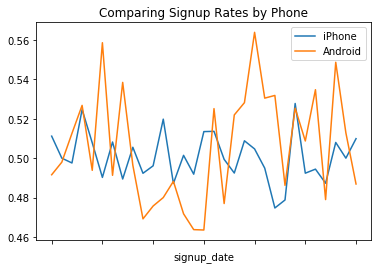

In [101]:
fig = ride_hail_data[ride_hail_data.phone=='iPhone'][
    ['signup_date', 'signed_up']].groupby('signup_date').mean().plot()
ride_hail_data[ride_hail_data.phone=='Android'][
    ['signup_date', 'signed_up']].groupby('signup_date').mean().plot(ax=fig)
plt.legend(['iPhone','Android'])
plt.title('Comparing Signup Rates by Phone')
plt.show()

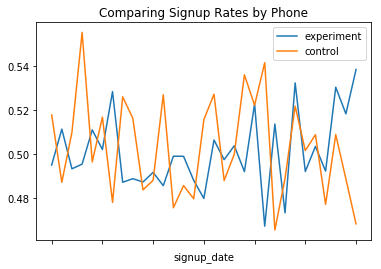

In [100]:
# Plot the experiment and control groups' sign up by date
fig = ride_hail_data[ride_hail_data.loyalty_pgm==1][
    ['signup_date', 'signed_up']].groupby('signup_date').mean().plot()
ride_hail_data[ride_hail_data.loyalty_pgm==0][
    ['signup_date', 'signed_up']].groupby('signup_date').mean().plot(ax=fig)
plt.legend(['experiment','control'])
plt.title('Comparing Signup Rates by Phone')
plt.show()


# Generate a test statistic comparing test and control on treatment date
#print('T-Test Results by Date')

#for date in experiment_data.treatment_date.unique():
#    dated_data = experiment_data[experiment_data.treatment_date == date]
#    print(stats.ttest_ind(dated_data[dated_data.test == 1].is_signed_up,
#                          dated_data[dated_data.test == 0].is_signed_up))

<h2>Conclusion</h2><br>
Though the experimental and control group are very similar the p-value indicates that there is a good probability that the samples are close to reality. Given the iPhone's popularity with the ride hailing application we can continue adding features to iPhone, and the Android apps and test market it in other cities also before launching it country-wide.